#Lista 1 Aprendizado Profundo

Professor: Tiago Maritan

Grupo:

*   André Hugo Ramalho Lopes - 20190019350
*   Edgard Henrique Coelho Tavares da Silva - 20210027041
*   Gustavo Henrique de Carvalho Costa Filho - 20210027060






##Questão 1

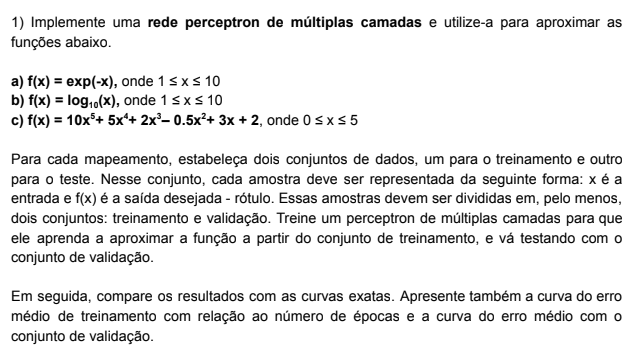

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns

In [ ]:
def train_with_early_stopping(model, x_train, y_train, x_val, y_val, criterion, optimizer, num_epochs=1000, early_stopping_patience=80):
    best_val_loss = float('inf')
    epochs_no_improve = 0
    early_stop = False

    train_losses = []
    val_losses = []

    for epoch in range(num_epochs):
        if early_stop:
            print(f'Early stopping at epoch {epoch+1}')
            break

        # Forward pass e perda de treinamento
        model.train()
        outputs = model(x_train)
        loss = criterion(outputs, y_train)

        # Backward e otimização
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        train_losses.append(loss.item())

        # Validação
        model.eval()
        with torch.no_grad():
            val_outputs = model(x_val)
            val_loss = criterion(val_outputs, y_val)
            val_losses.append(val_loss.item())

        # Checar para Early Stopping
        if val_loss < best_val_loss:
            best_val_loss = val_loss
            epochs_no_improve = 0
        else:
            epochs_no_improve += 1

        if epochs_no_improve >= early_stopping_patience:
            early_stop = True

        if (epoch+1) % 100 == 0:
            print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}, Val Loss: {val_loss.item():.4f}')

    return train_losses, val_losses, best_val_loss

###Letra A)

In [ ]:
# Gerar os dados x e y
x = np.linspace(1, 10, 1500)
y = np.exp(-x)

# Converter para tensores
x_tensor = torch.tensor(x, dtype=torch.float32).view(-1, 1)
y_tensor = torch.tensor(y, dtype=torch.float32).view(-1, 1)

# Embaralhar os dados
indices = torch.randperm(len(x_tensor))
x_tensor_shuffled = x_tensor[indices]
y_tensor_shuffled = y_tensor[indices]

# Dividir em treino e validação
train_size = int(0.8 * len(x_tensor))
x_train, y_train = x_tensor_shuffled[:train_size], y_tensor_shuffled[:train_size]
x_val, y_val = x_tensor_shuffled[train_size:], y_tensor_shuffled[train_size:]

# Verificação das formas dos conjuntos
print(f'Tamanho do conjunto de treino: {x_train.shape}, {y_train.shape}')
print(f'Tamanho do conjunto de validação: {x_val.shape}, {y_val.shape}')

Tamanho do conjunto de treino: torch.Size([1200, 1]), torch.Size([1200, 1])
Tamanho do conjunto de validação: torch.Size([300, 1]), torch.Size([300, 1])


In [ ]:
class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.hidden1 = nn.Linear(1, 25)
        self.hidden2 = nn.Linear(25, 25)
        self.output = nn.Linear(25, 1)
        self.tanh = nn.Tanh()

    def forward(self, x):
        x = self.tanh(self.hidden1(x))
        x = self.tanh(self.hidden2(x))
        x = self.output(x)
        return x

In [ ]:
model = MLP()
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

In [ ]:
train_losses, val_losses, best_val_loss = train_with_early_stopping(model, x_train, y_train, x_val, y_val, criterion, optimizer,200, 50)

Epoch [100/200], Loss: 0.0000, Val Loss: 0.0000
Epoch [200/200], Loss: 0.0000, Val Loss: 0.0000


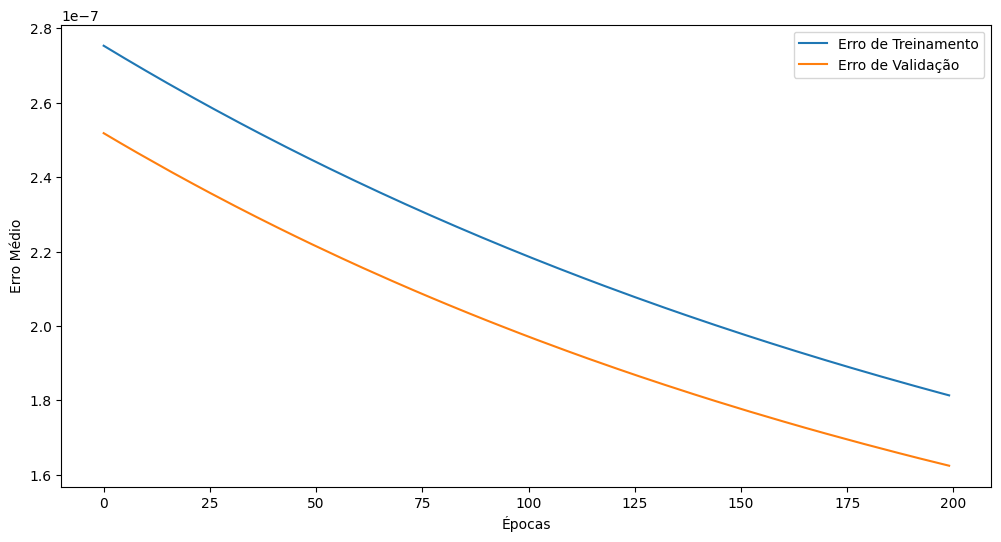

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(train_losses, label='Erro de Treinamento')
plt.plot(val_losses, label='Erro de Validação')
plt.xlabel('Épocas')
plt.ylabel('Erro Médio')
plt.legend()

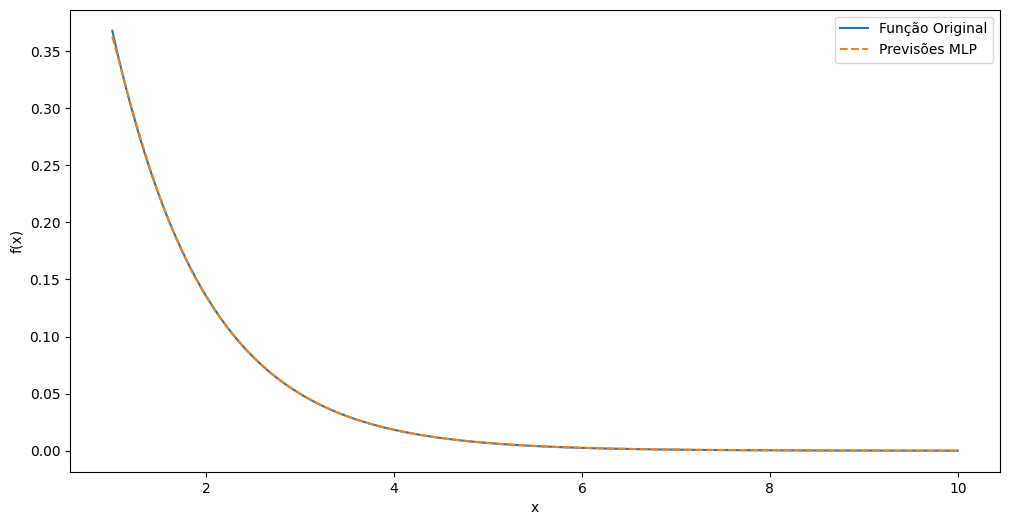

In [ ]:
model.eval()
with torch.no_grad():
    predictions = model(x_tensor).numpy()
plt.figure(figsize=(12, 6))
plt.plot(x, y, label='Função Original')
plt.plot(x, predictions, label='Previsões MLP', linestyle='--')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.show()

###Letra B

In [ ]:
# Gerar os dados x e y
x = np.linspace(1, 10, 1500)
y = np.log10(x)

# Converter para tensores
x_tensor = torch.tensor(x, dtype=torch.float32).view(-1, 1)
y_tensor = torch.tensor(y, dtype=torch.float32).view(-1, 1)

# Embaralhar os dados
indices = torch.randperm(len(x_tensor))
x_tensor_shuffled = x_tensor[indices]
y_tensor_shuffled = y_tensor[indices]

# Dividir em treino e validação
train_size = int(0.8 * len(x_tensor))
x_train, y_train = x_tensor_shuffled[:train_size], y_tensor_shuffled[:train_size]
x_val, y_val = x_tensor_shuffled[train_size:], y_tensor_shuffled[train_size:]

# Verificação das formas dos conjuntos
print(f'Tamanho do conjunto de treino: {x_train.shape}, {y_train.shape}')
print(f'Tamanho do conjunto de validação: {x_val.shape}, {y_val.shape}')

Tamanho do conjunto de treino: torch.Size([1200, 1]), torch.Size([1200, 1])
Tamanho do conjunto de validação: torch.Size([300, 1]), torch.Size([300, 1])


In [ ]:
class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.hidden1 = nn.Linear(1, 25)
        self.hidden2 = nn.Linear(25, 25)
        self.output = nn.Linear(25, 1)
        self.tanh = nn.Tanh()

    def forward(self, x):
        x = self.tanh(self.hidden1(x))
        x = self.tanh(self.hidden2(x))
        x = self.output(x)
        return x

In [ ]:
model = MLP()
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

In [ ]:
train_losses, val_losses, best_val_loss = train_with_early_stopping(model, x_train, y_train, x_val, y_val, criterion, optimizer,1000, 70)

Epoch [100/1000], Loss: 0.0001, Val Loss: 0.0001
Epoch [200/1000], Loss: 0.0000, Val Loss: 0.0000
Epoch [300/1000], Loss: 0.0000, Val Loss: 0.0000
Epoch [400/1000], Loss: 0.0000, Val Loss: 0.0000
Epoch [500/1000], Loss: 0.0000, Val Loss: 0.0000
Epoch [600/1000], Loss: 0.0000, Val Loss: 0.0000
Epoch [700/1000], Loss: 0.0000, Val Loss: 0.0000
Epoch [800/1000], Loss: 0.0000, Val Loss: 0.0000
Epoch [900/1000], Loss: 0.0000, Val Loss: 0.0000
Epoch [1000/1000], Loss: 0.0000, Val Loss: 0.0000


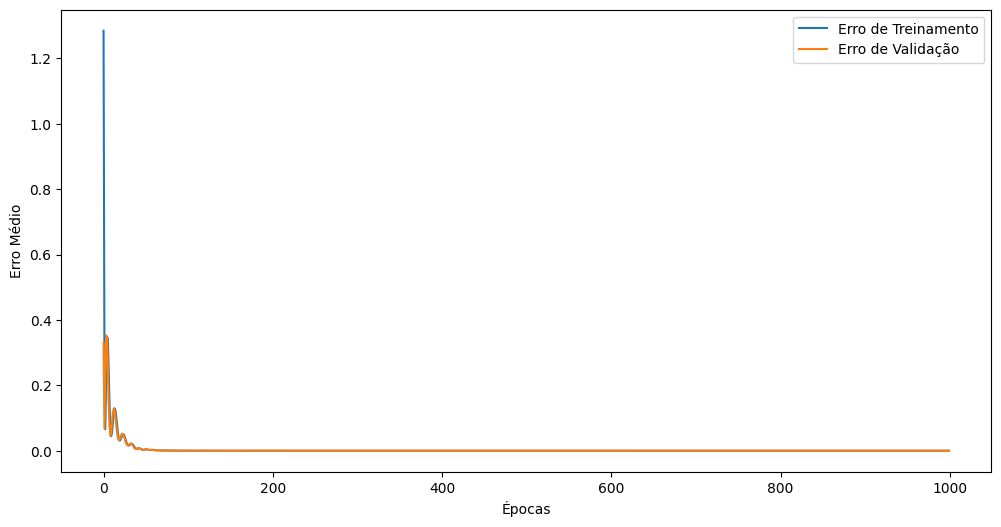

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(train_losses, label='Erro de Treinamento')
plt.plot(val_losses, label='Erro de Validação')
plt.xlabel('Épocas')
plt.ylabel('Erro Médio')
plt.legend()

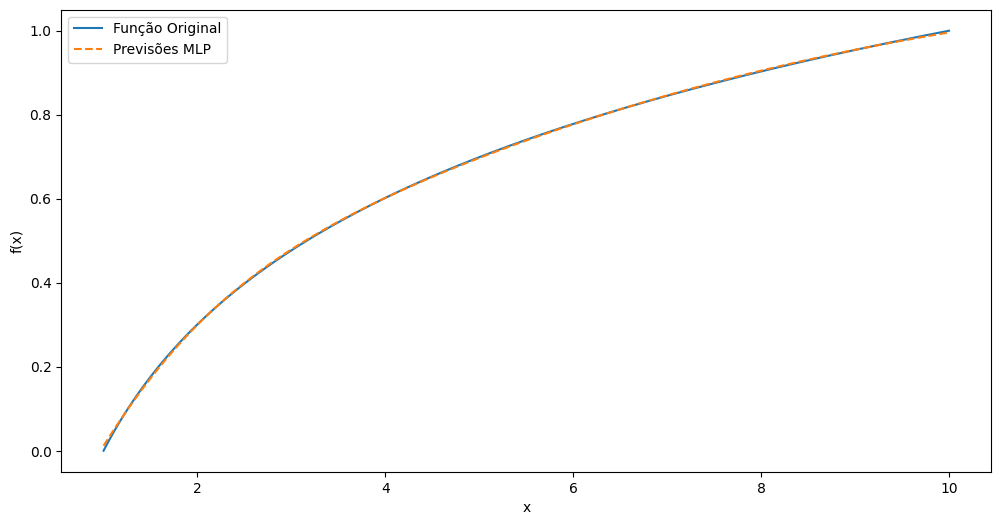

In [ ]:
model.eval()
with torch.no_grad():
    predictions = model(x_tensor).numpy()
plt.figure(figsize=(12, 6))
plt.plot(x, y, label='Função Original')
plt.plot(x, predictions, label='Previsões MLP', linestyle='--')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.show()

###Letra C)

In [ ]:
x = np.linspace(0, 5, 1500)  # Valores de x entre 0 e 5
y = 10 * x**5 + 5 * x**4 + 2 * x**3 - 0.5 * x**2 + 3 * x + 2  # Definindo f(x)

# Converter para tensores
x_tensor = torch.tensor(x, dtype=torch.float32).view(-1, 1)
y_tensor = torch.tensor(y, dtype=torch.float32).view(-1, 1)

# Embaralhar os dados
indices = torch.randperm(len(x_tensor))
x_tensor_shuffled = x_tensor[indices]
y_tensor_shuffled = y_tensor[indices]

# Dividir em treino e validação
train_size = int(0.8 * len(x_tensor))
x_train, y_train = x_tensor_shuffled[:train_size], y_tensor_shuffled[:train_size]
x_val, y_val = x_tensor_shuffled[train_size:], y_tensor_shuffled[train_size:]

# Verificação das formas dos conjuntos
print(f'Tamanho do conjunto de treino: {x_train.shape}, {y_train.shape}')
print(f'Tamanho do conjunto de validação: {x_val.shape}, {y_val.shape}')

Tamanho do conjunto de treino: torch.Size([1200, 1]), torch.Size([1200, 1])
Tamanho do conjunto de validação: torch.Size([300, 1]), torch.Size([300, 1])


In [ ]:
class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.hidden1 = nn.Linear(1, 25)
        self.hidden2 = nn.Linear(25, 25)
        self.output = nn.Linear(25, 1)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.relu(self.hidden1(x))
        x = self.relu(self.hidden2(x))
        x = self.output(x)
        return x

In [ ]:
model = MLP()
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr= 0.01)

In [ ]:
train_losses, val_losses, best_val_loss = train_with_early_stopping(model, x_train, y_train, x_val, y_val, criterion, optimizer,100000, 70)

Epoch [100/100000], Loss: 88784360.0000, Val Loss: 75311056.0000
Epoch [200/100000], Loss: 40428088.0000, Val Loss: 37711232.0000
Epoch [300/100000], Loss: 34844276.0000, Val Loss: 32590166.0000
Epoch [400/100000], Loss: 29900632.0000, Val Loss: 28064018.0000
Epoch [500/100000], Loss: 23808686.0000, Val Loss: 22454712.0000
Epoch [600/100000], Loss: 16318423.0000, Val Loss: 15727824.0000
Epoch [700/100000], Loss: 10292999.0000, Val Loss: 10135796.0000
Epoch [800/100000], Loss: 6292399.5000, Val Loss: 6357031.0000
Epoch [900/100000], Loss: 3876236.0000, Val Loss: 3980027.2500
Epoch [1000/100000], Loss: 2493804.2500, Val Loss: 2603710.7500
Epoch [1100/100000], Loss: 1679924.7500, Val Loss: 1770167.6250
Epoch [1200/100000], Loss: 1155669.5000, Val Loss: 1222467.5000
Epoch [1300/100000], Loss: 818975.1250, Val Loss: 864464.1875
Epoch [1400/100000], Loss: 601395.1250, Val Loss: 630854.6250
Epoch [1500/100000], Loss: 453128.5312, Val Loss: 471187.4062
Epoch [1600/100000], Loss: 349486.3438, V

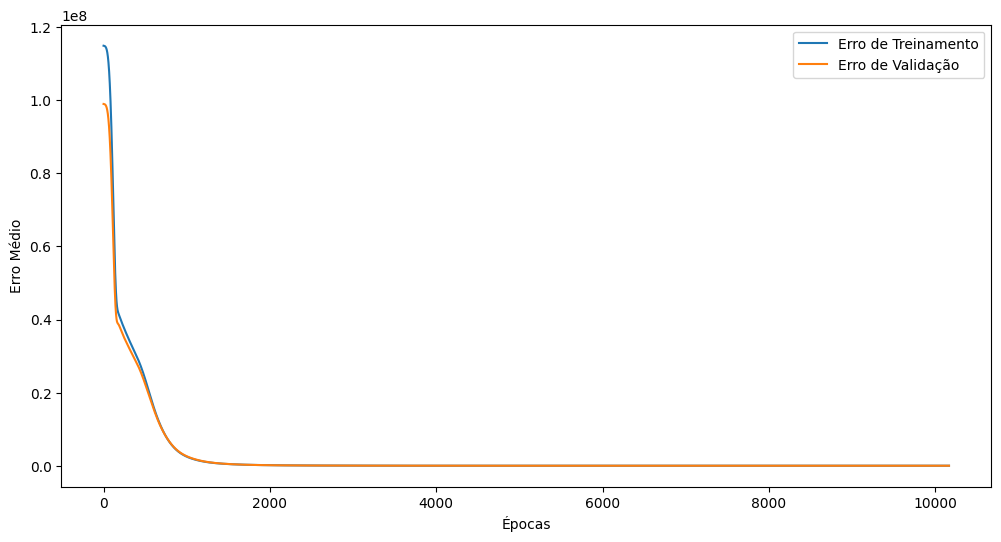

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(train_losses, label='Erro de Treinamento')
plt.plot(val_losses, label='Erro de Validação')
plt.xlabel('Épocas')
plt.ylabel('Erro Médio')
plt.legend()

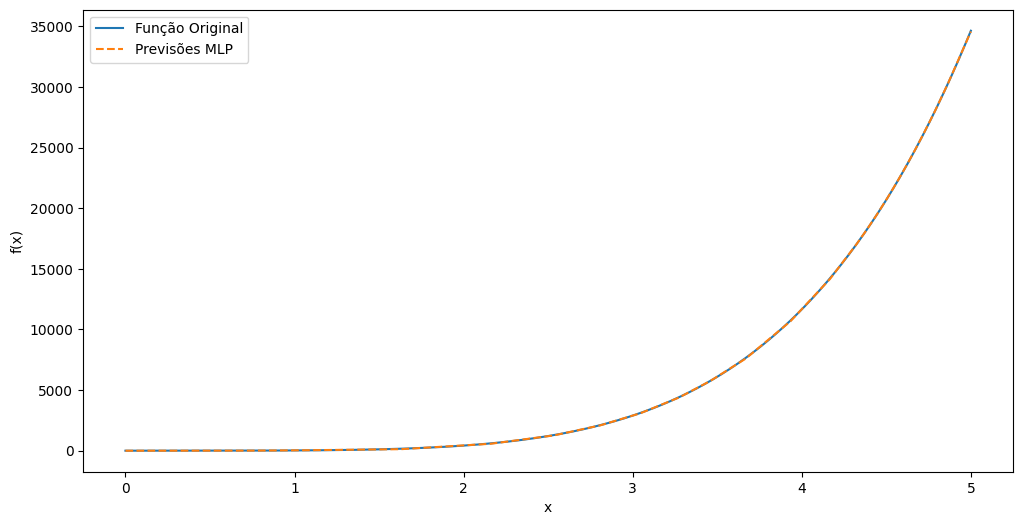

In [ ]:
model.eval()
with torch.no_grad():
    predictions = model(x_tensor).numpy()
plt.figure(figsize=(12, 6))
plt.plot(x, y, label='Função Original')
plt.plot(x, predictions, label='Previsões MLP', linestyle='--')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.show()

##Questão 2

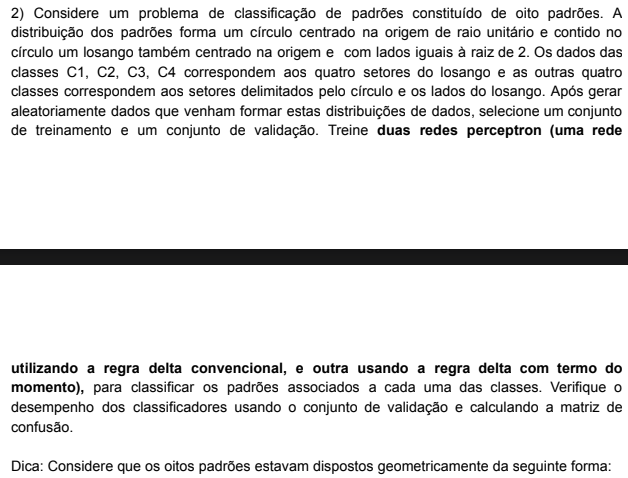

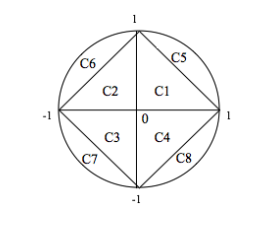

### Abordagem n1

Tentaremos fazer a predição sem o encoding de classes:

In [ ]:
def gerar_dados(n_samples=1000):
    data = []
    labels = []

    for _ in range(n_samples):
        # Gera um ponto aleatório no círculo unitário
        x, y = random.uniform(-1, 1), random.uniform(-1, 1)
        r = np.sqrt(x**2 + y**2)

        # Verificar se o ponto está dentro do círculo unitário
        if r <= 1:
            # Classificar os pontos de acordo com o setor
            if x >= 0 and y >= 0:
                if y <= -x + 1:
                    labels.append(0)  # Classe C1 (primeiro quadrante do losango)
                else:
                    labels.append(4)  # Classe C5 (primeiro quadrante do círculo)
            elif x < 0 and y >= 0:
                if y <= x + 1:
                    labels.append(1)  # Classe C2 (segundo quadrante do losango)
                else:
                    labels.append(5)  # Classe C6 (segundo quadrante do círculo)
            elif x <= 0 and y < 0:
                if y >= -x - 1:
                    labels.append(2)  # Classe C3 (terceiro quadrante do losango)
                else:
                    labels.append(6)  # Classe C7 (terceiro quadrante do círculo)
            elif x >= 0 and y < 0:
                if y >= x - 1:
                    labels.append(3)  # Classe C4 (quarto quadrante do losango)
                else:
                    labels.append(7)  # Classe C8 (quarto quadrante do círculo)

            data.append([x, y])

    return np.array(data), np.array(labels)

In [ ]:
class MLP_Q2(nn.Module):
    def __init__(self, input_size, output_size):
        super(MLP_Q2, self).__init__()
        self.fc1 = nn.Linear(2, 16)  # Camada de entrada para camada oculta
        self.fc2 = nn.Linear(16, 16) # Camada oculta para camada oculta
        self.fc3 = nn.Linear(16, 8)  # Camada oculta para saída (8 classes)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)  # Sem função de ativação aqui para a saída
        return x


In [ ]:
def plotar_matriz_confusao(cm, classes):
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=classes, yticklabels=classes)
    plt.ylabel('Classe Verdadeira')
    plt.xlabel('Classe Predita')
    plt.show()

In [ ]:
def treinar_e_avaliar(model, train_data, train_labels, test_data, test_labels, learning_rate=0.01, momentum=0, epochs=10000, patience=50, min_delta=0.001):
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.SGD(model.parameters(), lr=learning_rate, momentum=momentum)

    train_data = torch.tensor(train_data, dtype=torch.float32)
    train_labels = torch.tensor(train_labels, dtype=torch.long)
    test_data = torch.tensor(test_data, dtype=torch.float32)
    test_labels = torch.tensor(test_labels, dtype=torch.long)

    train_losses = []
    test_losses = []
    accuracies = []

    best_loss = float('inf')
    patience_counter = 0

    for epoch in range(epochs):
        model.train()
        optimizer.zero_grad()
        outputs = model(train_data)
        loss = criterion(outputs, train_labels)
        loss.backward()
        optimizer.step()

        # Avaliação do modelo nos dados de teste
        model.eval()
        with torch.no_grad():
            test_outputs = model(test_data)
            test_loss = criterion(test_outputs, test_labels)
            _, predicted = torch.max(test_outputs, 1)
            accuracy = accuracy_score(test_labels, predicted.numpy())
            accuracies.append(accuracy)

        train_losses.append(loss.item())
        test_losses.append(test_loss.item())

        # Verifica se a melhoria no erro é maior que o min_delta
        if best_loss - test_loss.item() > min_delta:
            best_loss = test_loss.item()
            patience_counter = 0  # Resetar o contador de paciência
        else:
            patience_counter += 1  # Incrementar o contador se não houver uma melhoria significativa

        # Parada antecipada se o contador de paciência exceder o limite
        if patience_counter >= patience:
            print(f'Parada antecipada na época {epoch}')
            break

        if epoch % 10 == 0:
            print(f'Época [{epoch}/{epochs}], Loss: {loss.item():.4f}, Test Loss: {test_loss.item():.4f}, Accuracy: {accuracy:.4f}')

    # Plotar a curva de perda e acurácia em gráficos separados
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

    # Gráfico de perda (loss)
    ax1.set_title('Curva de Perda durante o Treinamento')
    ax1.set_xlabel('Épocas')
    ax1.set_ylabel('Perda')
    ax1.plot(train_losses, label='Train Loss', color='tab:blue')
    ax1.plot(test_losses, label='Test Loss', color='tab:orange')
    ax1.legend()

    # Gráfico de acurácia
    ax2.set_title('Curva de Acurácia durante o Treinamento')
    ax2.set_xlabel('Épocas')
    ax2.set_ylabel('Acurácia')
    ax2.plot(accuracies, label='Accuracy', color='tab:green')
    ax2.legend()

    plt.tight_layout()
    plt.show()

    # Matriz de confusão
    with torch.no_grad():
        test_outputs = model(test_data)
        _, predicted = torch.max(test_outputs, 1)
        cm = confusion_matrix(test_labels, predicted)

    return accuracies[-1], cm

In [ ]:
train_data, train_labels = gerar_dados(8000)
test_data, test_labels = gerar_dados(2000)


Treinando rede sem momento:
Época [0/10000], Loss: 2.0989, Test Loss: 2.0914, Accuracy: 0.2079
Época [10/10000], Loss: 2.0949, Test Loss: 2.0875, Accuracy: 0.2123
Época [20/10000], Loss: 2.0910, Test Loss: 2.0837, Accuracy: 0.2142
Época [30/10000], Loss: 2.0872, Test Loss: 2.0800, Accuracy: 0.2187
Época [40/10000], Loss: 2.0834, Test Loss: 2.0763, Accuracy: 0.2206
Época [50/10000], Loss: 2.0798, Test Loss: 2.0727, Accuracy: 0.2231
Época [60/10000], Loss: 2.0762, Test Loss: 2.0692, Accuracy: 0.2250
Época [70/10000], Loss: 2.0727, Test Loss: 2.0658, Accuracy: 0.2263
Época [80/10000], Loss: 2.0693, Test Loss: 2.0624, Accuracy: 0.2289
Época [90/10000], Loss: 2.0660, Test Loss: 2.0591, Accuracy: 0.2339
Época [100/10000], Loss: 2.0627, Test Loss: 2.0559, Accuracy: 0.2327
Época [110/10000], Loss: 2.0595, Test Loss: 2.0527, Accuracy: 0.2238
Época [120/10000], Loss: 2.0563, Test Loss: 2.0496, Accuracy: 0.2168
Época [130/10000], Loss: 2.0532, Test Loss: 2.0465, Accuracy: 0.2117
Época [140/10000

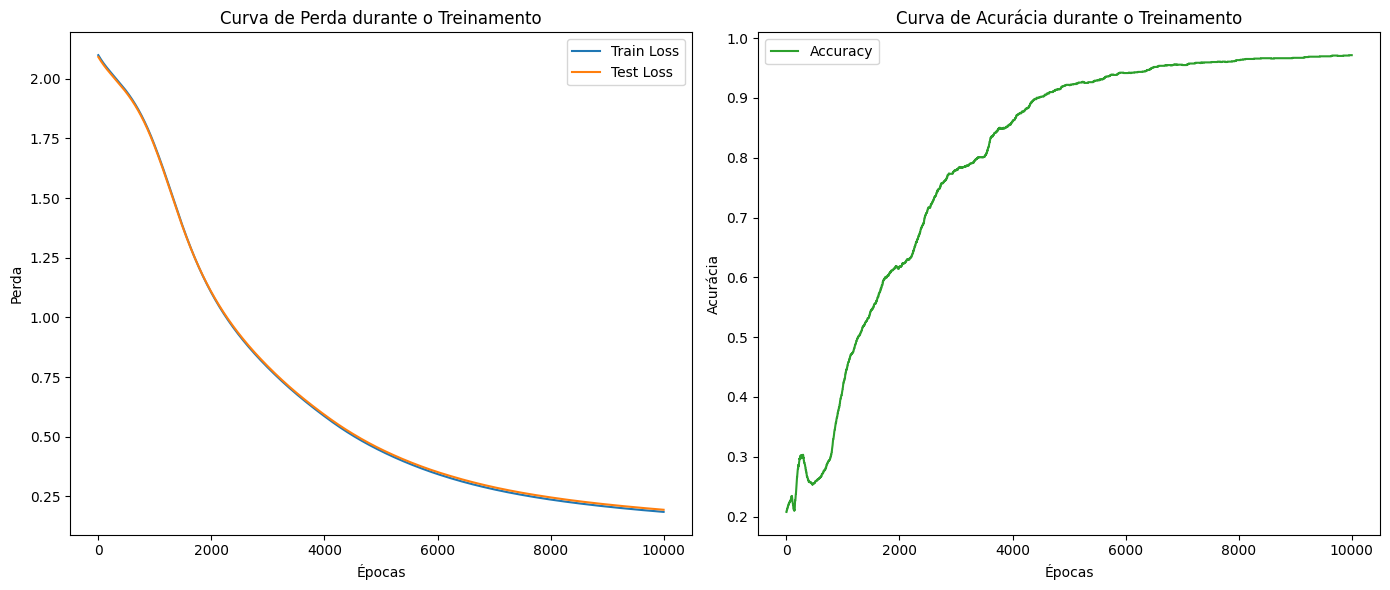

In [ ]:
model_sgd = MLP_Q2(input_size=2, output_size=8)
print("\nTreinando rede sem momento:")
accuracy_sgd, cm_sgd = treinar_e_avaliar(model_sgd, train_data, train_labels, test_data, test_labels, learning_rate=0.01, min_delta=0.0001)

Acurácia (SGD sem momento): 0.97

Matriz de confusão: 


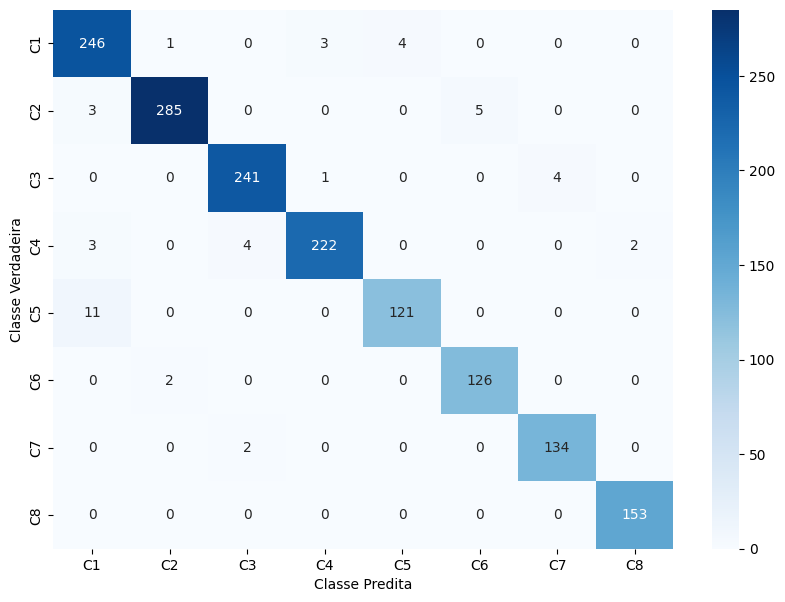

In [ ]:
print(f'Acurácia (SGD sem momento): {accuracy_sgd:.2f}\n')
print("Matriz de confusão: ")
classes = ["C1", "C2",  "C3", "C4", "C5", "C6", "C7", "C8"]
plotar_matriz_confusao(cm_sgd, classes)


Treinando rede com momento:
Época [0/10000], Loss: 2.0998, Test Loss: 2.1064, Accuracy: 0.1036
Época [10/10000], Loss: 2.0914, Test Loss: 2.0956, Accuracy: 0.1233
Época [20/10000], Loss: 2.0773, Test Loss: 2.0796, Accuracy: 0.1564
Época [30/10000], Loss: 2.0640, Test Loss: 2.0644, Accuracy: 0.1564
Época [40/10000], Loss: 2.0528, Test Loss: 2.0514, Accuracy: 0.1564
Época [50/10000], Loss: 2.0431, Test Loss: 2.0403, Accuracy: 0.1564
Época [60/10000], Loss: 2.0347, Test Loss: 2.0303, Accuracy: 0.1564
Época [70/10000], Loss: 2.0268, Test Loss: 2.0210, Accuracy: 0.1589
Época [80/10000], Loss: 2.0190, Test Loss: 2.0118, Accuracy: 0.1856
Época [90/10000], Loss: 2.0108, Test Loss: 2.0022, Accuracy: 0.2155
Época [100/10000], Loss: 2.0016, Test Loss: 1.9916, Accuracy: 0.3185
Época [110/10000], Loss: 1.9910, Test Loss: 1.9795, Accuracy: 0.2854
Época [120/10000], Loss: 1.9783, Test Loss: 1.9655, Accuracy: 0.2765
Época [130/10000], Loss: 1.9630, Test Loss: 1.9489, Accuracy: 0.2753
Época [140/10000

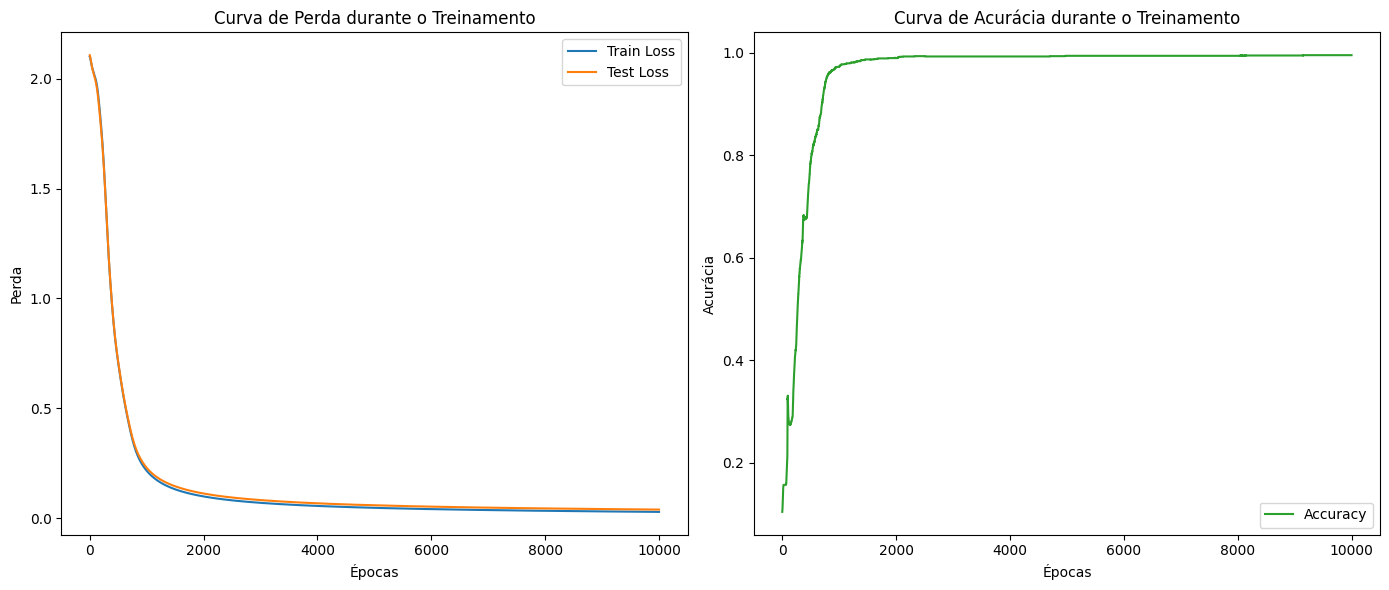

In [ ]:
model_momentum = MLP_Q2(input_size=2, output_size=8)
print("\nTreinando rede com momento:")
accuracy_momentum, cm_momentum = treinar_e_avaliar(model_momentum, train_data, train_labels, test_data, test_labels, learning_rate=0.01, min_delta=0.0001, momentum=0.9)

Acurácia (SGD com momento): 1.00
Matriz de confusão: 


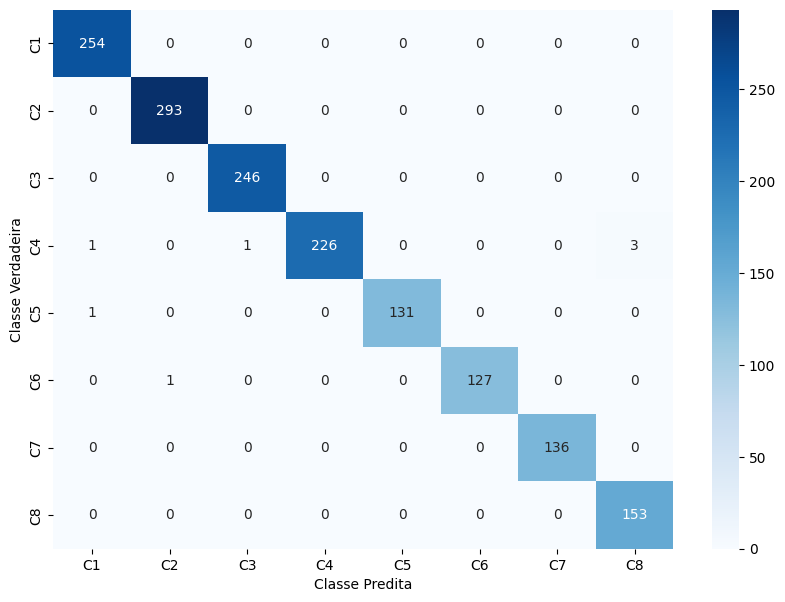

In [ ]:
print(f'Acurácia (SGD com momento): {accuracy_momentum:.2f}')
print("Matriz de confusão: ")
classes = ["C1", "C2",  "C3", "C4", "C5", "C6", "C7", "C8"]
plotar_matriz_confusao(cm_momentum, classes)

A utilização de Momentum favorece uma maior acurácia pelo fato de suavizar o comportamento oscilatório do gradiente em áreas de maior complexidade. O momentum se comporta como um tipo de "Inércia", em que a troca de direção não é tão simples e leva em conta o movimento que se faz anteriormente.


### Abordagem n2

Tentaremos fazer a predição com o encoding de classes:

In [ ]:
def treinar_e_avaliar_rede(model, train_data, train_labels, test_data, test_labels, learning_rate=0.01, momentum=0, epochs=10000, patience=50, min_delta=0.001):
    criterion = nn.BCELoss()  # Binary Cross-Entropy Loss para saídas one-hot
    optimizer = optim.SGD(model.parameters(), lr=learning_rate, momentum=momentum)

    # Converta os rótulos para one-hot encoding
    train_labels_one_hot = torch.nn.functional.one_hot(torch.tensor(train_labels), num_classes=8).float()
    test_labels_one_hot = torch.nn.functional.one_hot(torch.tensor(test_labels), num_classes=8).float()

    train_data = torch.tensor(train_data, dtype=torch.float32)
    test_data = torch.tensor(test_data, dtype=torch.float32)

    train_losses = []
    test_losses = []
    accuracies = []

    best_loss = float('inf')
    patience_counter = 0

    for epoch in range(epochs):
        model.train()
        optimizer.zero_grad()
        outputs = torch.sigmoid(model(train_data))  # Garantir saídas entre 0 e 1
        loss = criterion(outputs, train_labels_one_hot)
        loss.backward()
        optimizer.step()

        # Avaliação do modelo nos dados de teste
        model.eval()
        with torch.no_grad():
            test_outputs = torch.sigmoid(model(test_data))
            test_loss = criterion(test_outputs, test_labels_one_hot)
            _, predicted = torch.max(test_outputs, 1)
            accuracy = accuracy_score(test_labels, predicted)
            accuracies.append(accuracy)

        train_losses.append(loss.item())
        test_losses.append(test_loss.item())

        # Verifica se a melhoria no erro é maior que o min_delta
        if best_loss - test_loss.item() > min_delta:
            best_loss = test_loss.item()
            patience_counter = 0  # Resetar o contador de paciência
        else:
            patience_counter += 1  # Incrementar o contador se não houver uma melhoria significativa

        # Parada antecipada se o contador de paciência exceder o limite
        if patience_counter >= patience:
            print(f'Parada antecipada na época {epoch}')
            break

        if epoch % 10 == 0:
            print(f'Época [{epoch}/{epochs}], Loss: {loss.item():.4f}, Test Loss: {test_loss.item():.4f}, Accuracy: {accuracy:.4f}')

    # Plotar a curva de loss e acurácia em gráficos separados
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

    # Gráfico de perda (loss)
    ax1.set_title('Curva de Perda durante o Treinamento')
    ax1.set_xlabel('Épocas')
    ax1.set_ylabel('Perda')
    ax1.plot(train_losses, label='Train Loss', color='tab:blue')
    ax1.plot(test_losses, label='Test Loss', color='tab:orange')
    ax1.legend()

    # Gráfico de acurácia
    ax2.set_title('Curva de Acurácia durante o Treinamento')
    ax2.set_xlabel('Épocas')
    ax2.set_ylabel('Acurácia')
    ax2.plot(accuracies, label='Accuracy', color='tab:green')
    ax2.legend()

    plt.tight_layout()
    plt.show()

    # Matriz de confusão
    with torch.no_grad():
        test_outputs = torch.sigmoid(model(test_data))
        _, predicted = torch.max(test_outputs, 1)
        cm = confusion_matrix(test_labels, predicted)

    return accuracies[-1], cm

In [ ]:
data, labels = gerar_dados(n_samples=10000)  # Gerando 1000 amostras de dados
num_train = int(0.8 * len(data))  # 80% dos dados para treinamento
train_data, test_data = data[:num_train], data[num_train:]
train_labels, test_labels = labels[:num_train], labels[num_train:]

Época [0/10000], Loss: 0.7044, Test Loss: 0.7046, Accuracy: 0.0827
Época [10/10000], Loss: 0.7012, Test Loss: 0.7013, Accuracy: 0.0827
Época [20/10000], Loss: 0.6979, Test Loss: 0.6980, Accuracy: 0.0827
Época [30/10000], Loss: 0.6946, Test Loss: 0.6948, Accuracy: 0.0827
Época [40/10000], Loss: 0.6914, Test Loss: 0.6915, Accuracy: 0.0827
Época [50/10000], Loss: 0.6882, Test Loss: 0.6883, Accuracy: 0.0827
Época [60/10000], Loss: 0.6849, Test Loss: 0.6850, Accuracy: 0.0827
Época [70/10000], Loss: 0.6817, Test Loss: 0.6818, Accuracy: 0.0827
Época [80/10000], Loss: 0.6784, Test Loss: 0.6786, Accuracy: 0.0827
Época [90/10000], Loss: 0.6752, Test Loss: 0.6753, Accuracy: 0.0827
Época [100/10000], Loss: 0.6719, Test Loss: 0.6720, Accuracy: 0.0827
Época [110/10000], Loss: 0.6687, Test Loss: 0.6688, Accuracy: 0.0833
Época [120/10000], Loss: 0.6654, Test Loss: 0.6655, Accuracy: 0.0833
Época [130/10000], Loss: 0.6621, Test Loss: 0.6622, Accuracy: 0.0833
Época [140/10000], Loss: 0.6588, Test Loss: 0

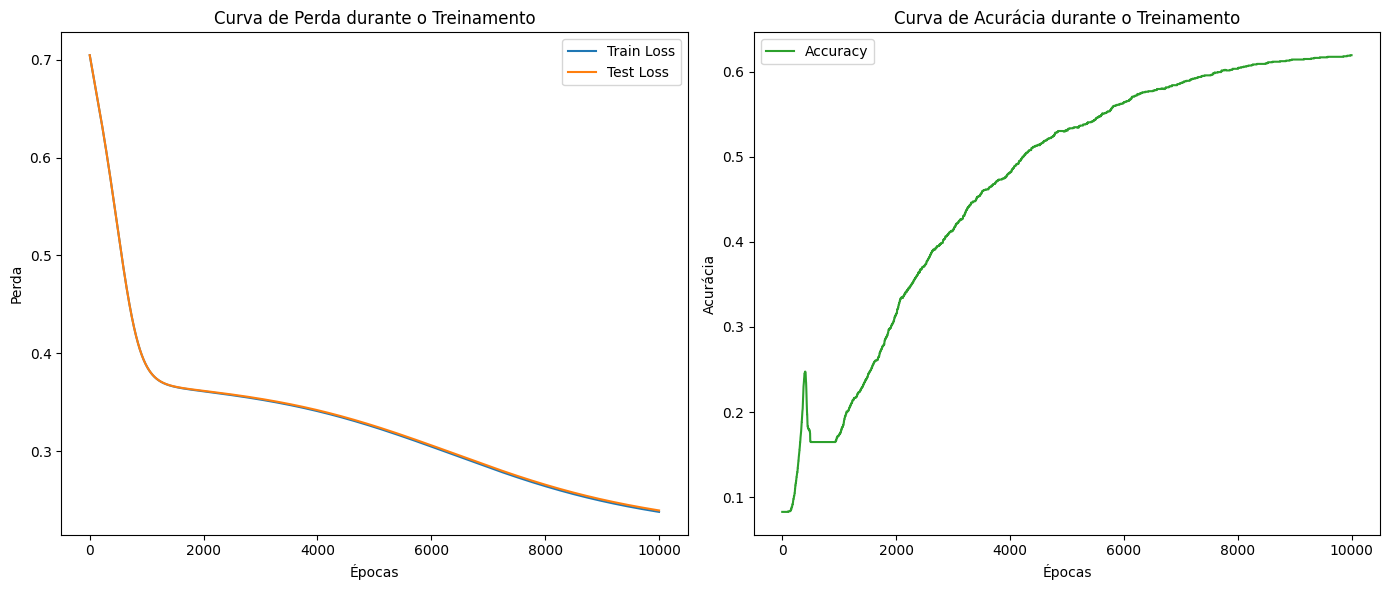

In [ ]:
model = MLP_Q2(input_size=2, output_size=8)
accuracy, cm = treinar_e_avaliar_rede(model, train_data, train_labels, test_data, test_labels, min_delta=0.0001)

Acurácia One Hot: 0.62
Matriz de confusão: 


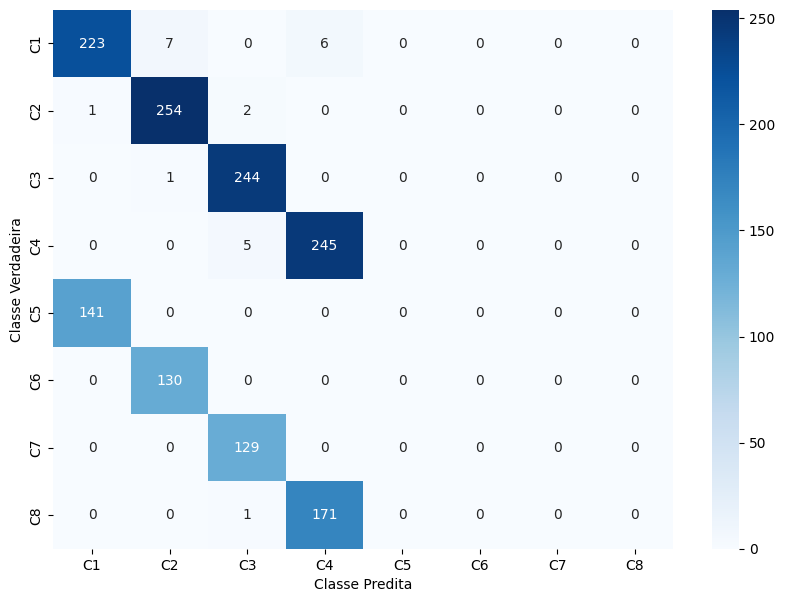

In [ ]:
print(f'Acurácia One Hot: {accuracy:.2f}')
print("Matriz de confusão: ")
classes = ['C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8']
plotar_matriz_confusao(cm, classes)

Época [0/10000], Loss: 0.6670, Test Loss: 0.6670, Accuracy: 0.0737
Época [10/10000], Loss: 0.6527, Test Loss: 0.6506, Accuracy: 0.0846
Época [20/10000], Loss: 0.6265, Test Loss: 0.6237, Accuracy: 0.1192
Época [30/10000], Loss: 0.5970, Test Loss: 0.5940, Accuracy: 0.1513
Época [40/10000], Loss: 0.5663, Test Loss: 0.5631, Accuracy: 0.1513
Época [50/10000], Loss: 0.5350, Test Loss: 0.5317, Accuracy: 0.1513
Época [60/10000], Loss: 0.5038, Test Loss: 0.5004, Accuracy: 0.1513
Época [70/10000], Loss: 0.4736, Test Loss: 0.4702, Accuracy: 0.1513
Época [80/10000], Loss: 0.4459, Test Loss: 0.4428, Accuracy: 0.1737
Época [90/10000], Loss: 0.4222, Test Loss: 0.4196, Accuracy: 0.2410
Época [100/10000], Loss: 0.4036, Test Loss: 0.4015, Accuracy: 0.2917
Época [110/10000], Loss: 0.3902, Test Loss: 0.3887, Accuracy: 0.3083
Época [120/10000], Loss: 0.3813, Test Loss: 0.3803, Accuracy: 0.2853
Época [130/10000], Loss: 0.3758, Test Loss: 0.3751, Accuracy: 0.2397
Época [140/10000], Loss: 0.3724, Test Loss: 0

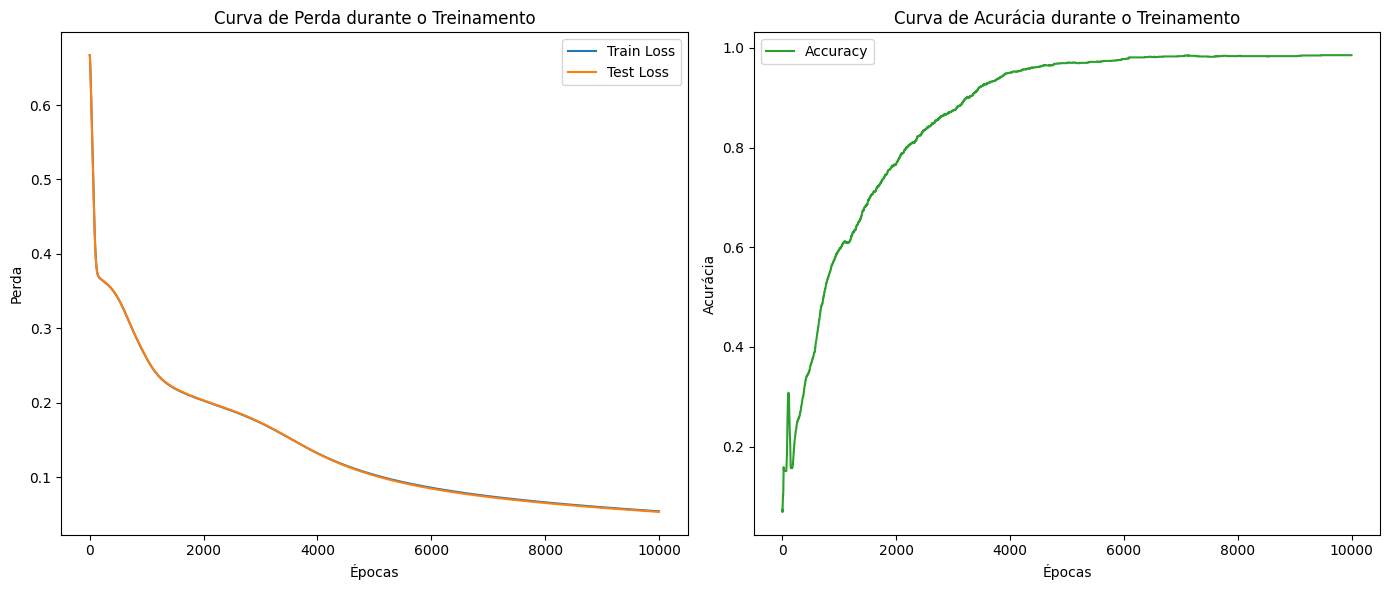

In [ ]:
model_mom = MLP_Q2(2, 8)
accuracy_mom, cm_mom = treinar_e_avaliar_rede(model_mom, train_data, train_labels, test_data, test_labels, min_delta=0.0001, momentum=0.9)

Acurácia One Hot (com momentum): 0.99
Matriz de confusão: 


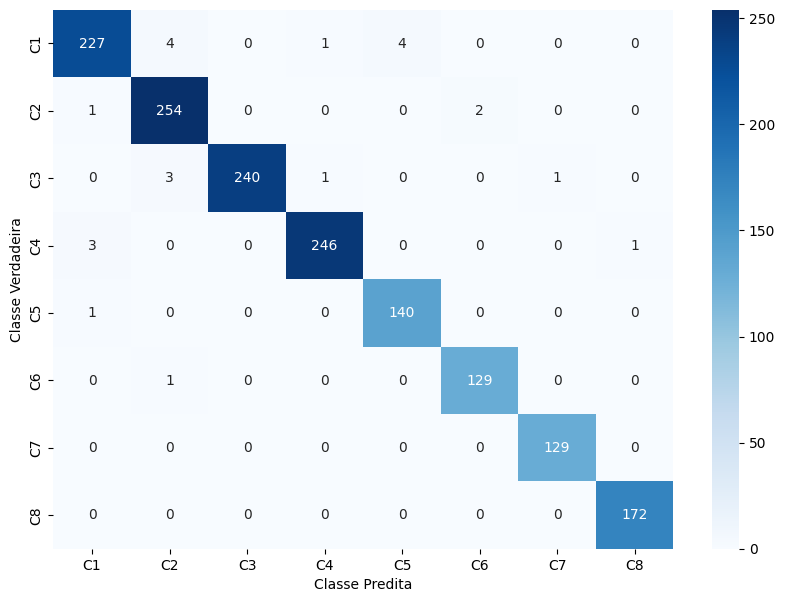

In [ ]:
print(f'Acurácia One Hot (com momentum): {accuracy_mom:.2f}')
print("Matriz de confusão: ")
classes = ['C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8']
plotar_matriz_confusao(cm_mom, classes)

##Questão 3

In [ ]:
def generate_series(n):
    return 2 * np.sin(0.5 * n) + np.cos(1.5 * n + np.pi/4)


In [ ]:
n = np.arange(0, 200, 0.001)
series = generate_series(n)

In [ ]:
def prepare_data(series, K):
    X, Y = [], []
    for i in range(len(series) - K - 3):  # Para predição de 3 passos à frente
        X.append(series[i:i+K])  # Entradas (K valores anteriores)
        Y.append(series[i+K:i+K+3])  # Saída (próximos 3 valores)
    return np.array(X), np.array(Y)

In [ ]:
K = 10
X, Y = prepare_data(series, K)

scaler_X = MinMaxScaler()
scaler_Y = MinMaxScaler()

X = scaler_X.fit_transform(X)
Y = scaler_Y.fit_transform(Y)

# Dividindo os dados em treino e teste
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Convertendo para tensores do PyTorch
X_train = torch.FloatTensor(X_train)
Y_train = torch.FloatTensor(Y_train)
X_test = torch.FloatTensor(X_test)
Y_test = torch.FloatTensor(Y_test)

In [ ]:
class MLP_Q3(nn.Module):
    def __init__(self, input_size, output_size):
        super(MLP_Q3, self).__init__()
        self.fc1 = nn.Linear(input_size, 64)  # Primeira camada com 64 neurônios
        self.fc2 = nn.Linear(64, 64)
        self.fc3 = nn.Linear(64, 32)  # Segunda camada com 32 neurônios
        self.fc4 = nn.Linear(32, output_size)  # Camada de saída com 3 neurônios

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = torch.relu(self.fc3(x))
        x = self.fc4(x)
        return x

In [ ]:
model = MLP_Q3(input_size=K, output_size=3)

In [ ]:
def train_model(model, X_train, Y_train, X_test, Y_test, epochs=100, patience=10):
    criterion = nn.MSELoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

    train_losses = []
    test_losses = []
    accuracies = []

    min_test_loss = float('inf')
    no_improvement_epochs = 0
    best_model_state = None

    for epoch in range(epochs):
        # Treinamento
        model.train()
        optimizer.zero_grad()
        output_train = model(X_train)
        loss_train = criterion(output_train, Y_train)
        loss_train.backward()
        optimizer.step()

        # Avaliação no conjunto de teste
        model.eval()
        with torch.no_grad():
            output_test = model(X_test)
            loss_test = criterion(output_test, Y_test)
            # Erro médio para cálculo da acurácia
            errors = torch.abs(output_test - Y_test).mean(dim=0)
            accuracy = 1 / errors.mean().item()  # Acurácia = 1 / erro médio

        train_losses.append(loss_train.item())
        test_losses.append(loss_test.item())
        accuracies.append(accuracy)

        # Verifica melhora no teste (early stopping)
        if loss_test.item() < min_test_loss:
            min_test_loss = loss_test.item()
            best_model_state = model.state_dict()
            no_improvement_epochs = 0
        else:
            no_improvement_epochs += 1

        if no_improvement_epochs >= patience:
            print(f"Early stopping at epoch {epoch+1}")
            break

        # Exibir estatísticas a cada 10 épocas
        if (epoch+1) % 10 == 0:
            print(f"Epoch {epoch+1}/{epochs}, Loss: {loss_train.item()}, Test Loss: {loss_test.item()}, Accuracy: {accuracy}")

    # Carregar o melhor modelo
    model.load_state_dict(best_model_state)

    return train_losses, test_losses, accuracies

In [ ]:
train_losses, test_losses, accuracies = train_model(model, X_train, Y_train, X_test, Y_test, epochs=1000, patience=50)

Epoch 10/1000, Loss: 0.3232782483100891, Test Loss: 0.31670689582824707, Accuracy: 2.004617718515842
Epoch 20/1000, Loss: 0.22748687863349915, Test Loss: 0.2165861874818802, Accuracy: 2.465966405112776
Epoch 30/1000, Loss: 0.08330657333135605, Test Loss: 0.0691119059920311, Accuracy: 4.401954944497105
Epoch 40/1000, Loss: 0.01682151108980179, Test Loss: 0.020788036286830902, Accuracy: 7.765123879022159
Epoch 50/1000, Loss: 0.010961816646158695, Test Loss: 0.008820519782602787, Accuracy: 13.30966152805077
Epoch 60/1000, Loss: 0.008416865020990372, Test Loss: 0.008167632855474949, Accuracy: 13.876305048157445
Epoch 70/1000, Loss: 0.0031355407554656267, Test Loss: 0.002946777269244194, Accuracy: 23.903303073172292
Epoch 80/1000, Loss: 0.0015398949617519975, Test Loss: 0.0013805910712108016, Accuracy: 38.15906760882285
Epoch 90/1000, Loss: 0.0005863068508915603, Test Loss: 0.0005356060573831201, Accuracy: 71.32178382137954
Epoch 100/1000, Loss: 0.00030308071291074157, Test Loss: 0.00030494

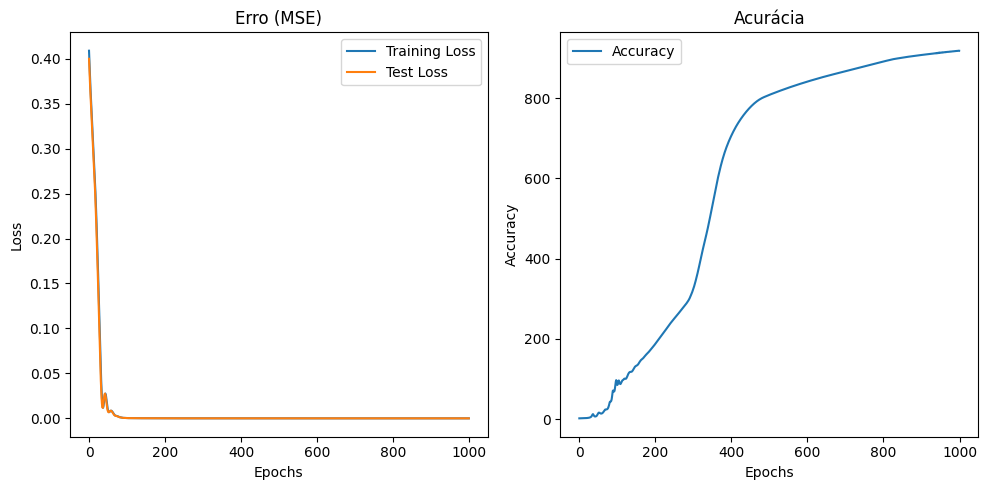

In [ ]:
# Plotando erro e acurácia
epochs_range = range(len(train_losses))

plt.figure(figsize=(10, 5))

# Plot do erro (perda) no treino e teste
plt.subplot(1, 2, 1)
plt.plot(epochs_range, train_losses, label='Training Loss')
plt.plot(epochs_range, test_losses, label='Test Loss')
plt.title('Erro (MSE)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot da acurácia
plt.subplot(1, 2, 2)
plt.plot(epochs_range, accuracies, label='Accuracy')
plt.title('Acurácia')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
def predict_interval(model, series, K, start, end):
    model.eval()
    predictions = []

    with torch.no_grad():
        for i in range(start, end - K):
            input_data = series[i:i+K]  # Pegando K valores anteriores
            input_data = scaler_X.transform([input_data])  # Normalizando com o scaler de entrada
            input_tensor = torch.FloatTensor(input_data)
            pred = model(input_tensor).numpy().flatten()  # Fazendo a predição
            pred = scaler_Y.inverse_transform([pred])  # Revertendo a normalização para as saídas
            predictions.extend(pred)  # Adicionando as predições à lista

    return np.array(predictions)



In [ ]:
start = 0
end = 50000

# Predições do modelo
predictions = predict_interval(model, series, K, start, end)

# Valores reais para comparação
real_values = series[start + K + 3:end + 3]  # Adicionando o deslocamento de 3 passos


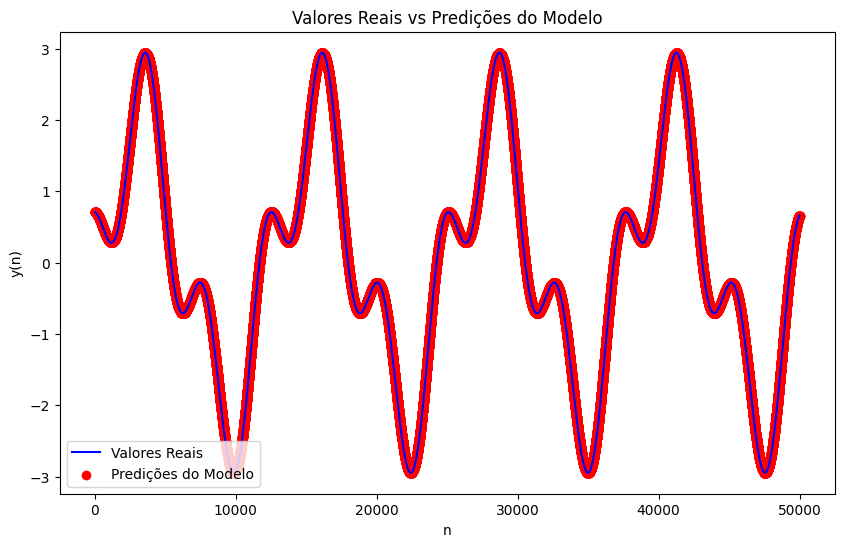

In [ ]:
# Plotando os resultados
plt.figure(figsize=(10, 6))
plt.plot(range(start + K, end), real_values, label='Valores Reais', color='blue')
plt.scatter(range(start + K + 1, end + 1), predictions[:,0], label='Predições do Modelo', color='red', marker='o')
#plt.scatter(range(start + K + 2, end + 2), predictions[:,1], label='Predições do Modelo', color='green', marker='x')
#plt.scatter(range(start + K + 3, end + 3), predictions[:,2], label='Predições do Modelo', color='blue', marker='v')
plt.title('Valores Reais vs Predições do Modelo')
plt.xlabel('n')
plt.ylabel('y(n)')
plt.legend()
plt.show()

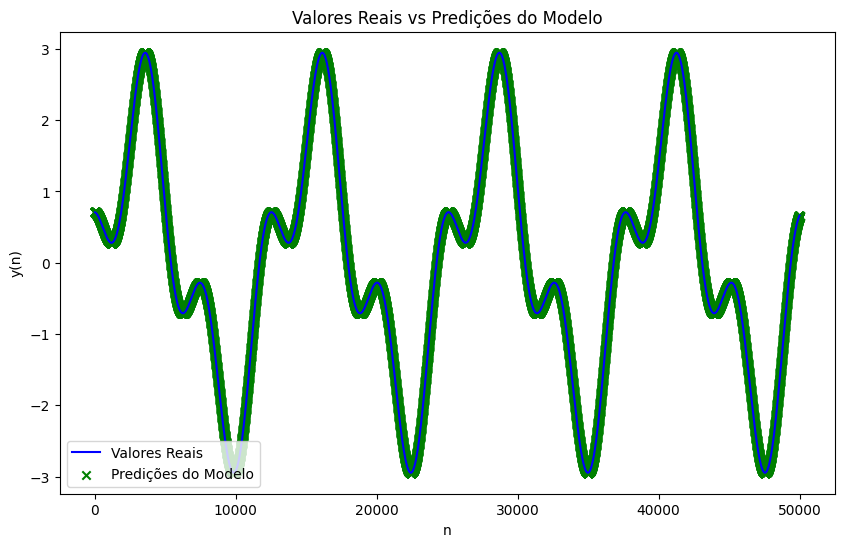

In [ ]:
# Plotando os resultados
plt.figure(figsize=(10, 6))
plt.plot(range(start + K, end), real_values, label='Valores Reais', color='blue')
#plt.scatter(range(start + K + 1, end + 1), predictions[:,0], label='Predições do Modelo', color='red', marker='o')
plt.scatter(range(start + K + 2, end + 2), predictions[:,1], label='Predições do Modelo', color='green', marker='x')
#plt.scatter(range(start + K + 3, end + 3), predictions[:,2], label='Predições do Modelo', color='blue', marker='v')
plt.title('Valores Reais vs Predições do Modelo')
plt.xlabel('n')
plt.ylabel('y(n)')
plt.legend()
plt.show()

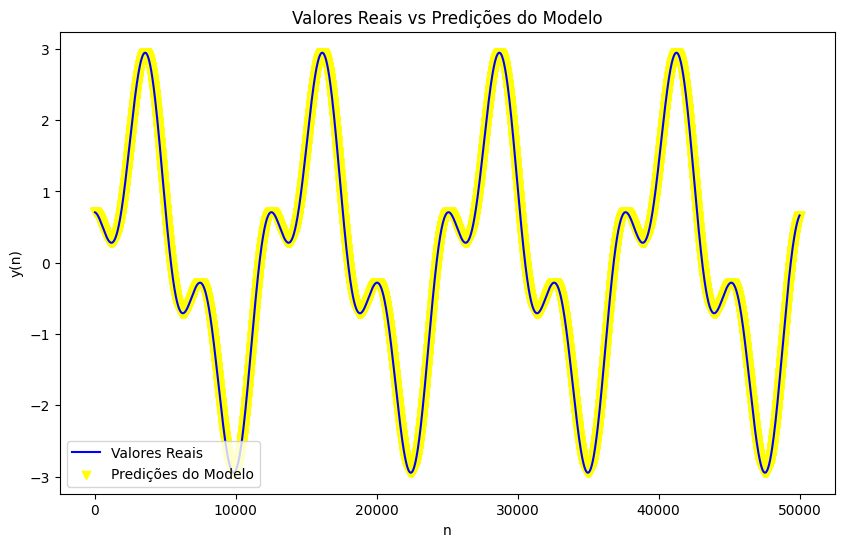

In [ ]:
# Plotando os resultados
plt.figure(figsize=(10, 6))
plt.plot(range(start + K, end), real_values, label='Valores Reais', color='blue')
#plt.scatter(range(start + K + 1, end + 1), predictions[:,0], label='Predições do Modelo', color='red', marker='o')
#plt.scatter(range(start + K + 2, end + 2), predictions[:,1], label='Predições do Modelo', color='green', marker='x')
plt.scatter(range(start + K + 3, end + 3), predictions[:,2], label='Predições do Modelo', color='yellow', marker='v')
plt.title('Valores Reais vs Predições do Modelo')
plt.xlabel('n')
plt.ylabel('y(n)')
plt.legend()
plt.show()

In [ ]:
start = 0
end = 75

# Predições do modelo
predictions = predict_interval(model, series, K, start, end)

# Valores reais para comparação
real_values = series[start + K + 3:end + 3]  # Adicionando o deslocamento de 3 passos

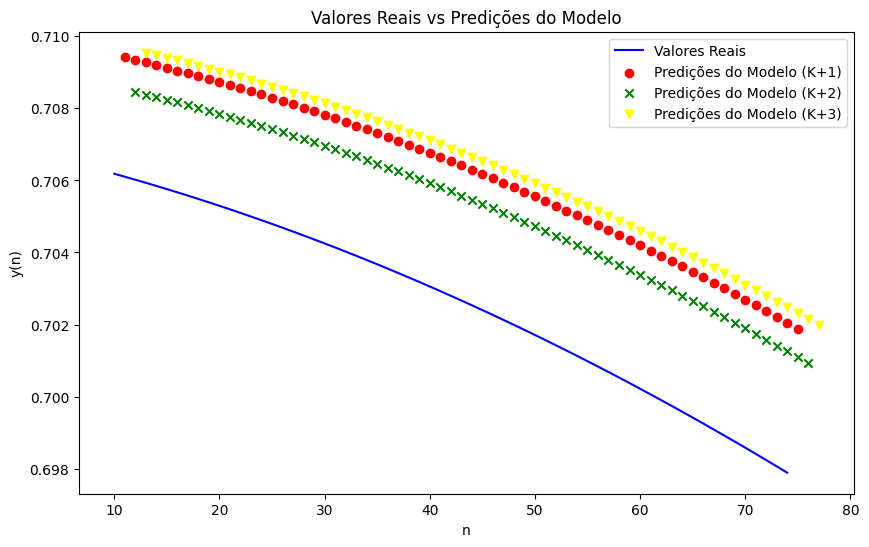

In [ ]:
# Plotando os resultados
plt.figure(figsize=(10, 6))
plt.plot(range(start + K, end), real_values, label='Valores Reais', color='blue')
plt.scatter(range(start + K + 1, end + 1), predictions[:,0], label='Predições do Modelo (K+1)', color='red', marker='o')
plt.scatter(range(start + K + 2, end + 2), predictions[:,1], label='Predições do Modelo (K+2)', color='green', marker='x')
plt.scatter(range(start + K + 3, end + 3), predictions[:,2], label='Predições do Modelo (K+3)', color='yellow', marker='v')
plt.title('Valores Reais vs Predições do Modelo')
plt.xlabel('n')
plt.ylabel('y(n)')
plt.legend()
plt.show()

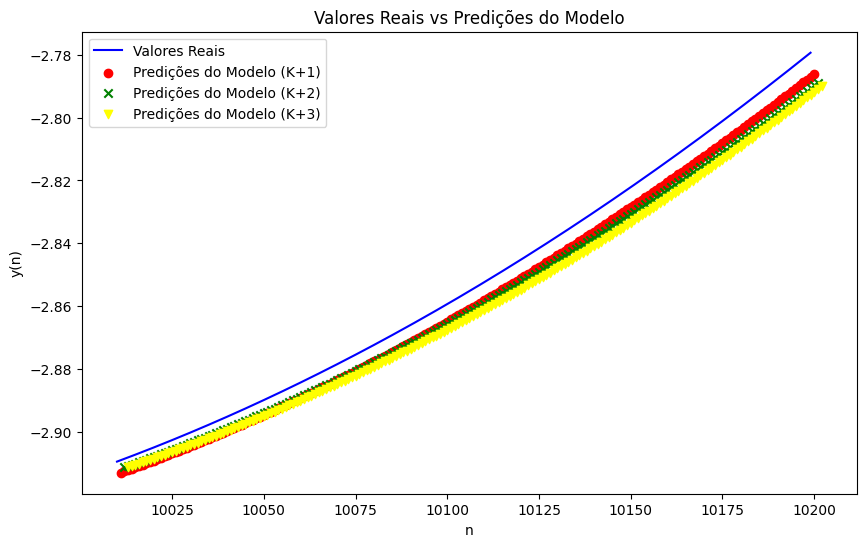

In [ ]:
start1 = 10000
end1 = 10200

# Predições do modelo
predictions = predict_interval(model, series, K, start1, end1)

# Valores reais para comparação
real_values = series[start1 + K + 3:end1 + 3]

plt.figure(figsize=(10, 6))
plt.plot(range(start1 + K, end1), real_values, label='Valores Reais', color='blue')
plt.scatter(range(start1 + K + 1, end1 + 1), predictions[:,0], label='Predições do Modelo (K+1)', color='red', marker='o')
plt.scatter(range(start1 + K + 2, end1 + 2), predictions[:,1], label='Predições do Modelo (K+2)', color='green', marker='x')
plt.scatter(range(start1 + K + 3, end1 + 3), predictions[:,2], label='Predições do Modelo (K+3)', color='yellow', marker='v')
plt.title('Valores Reais vs Predições do Modelo')
plt.xlabel('n')
plt.ylabel('y(n)')
plt.legend()
plt.show()

# Questão 4


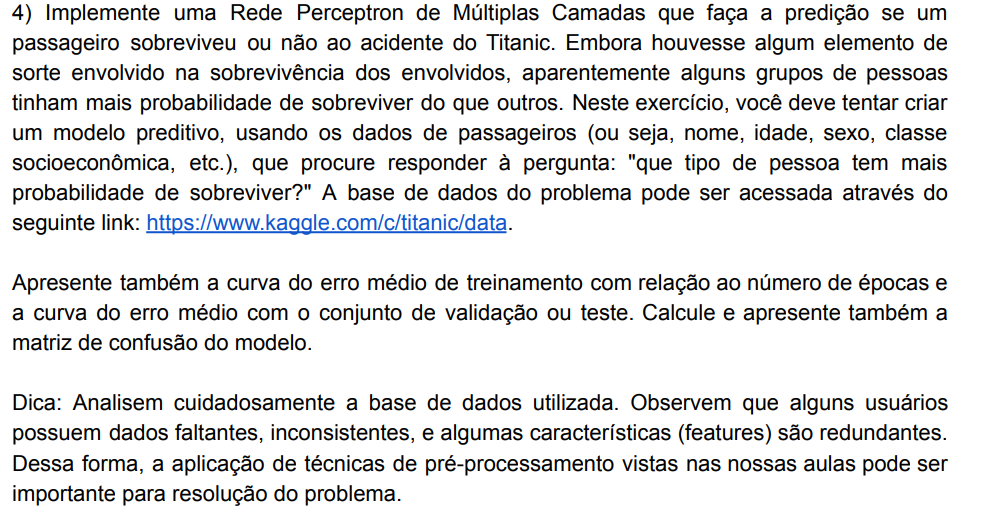

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt


Limpeza e preparação

In [ ]:
# Carregar e preparar os dados
data_treino = pd.read_csv('train.csv')
data_treino.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
# Verificar valores faltantes
missing_values = data_treino.isnull().sum()
print(missing_values)

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [ ]:
# Verificar valores que estão zerados em todas as colunas
zero_values = (data_treino == 0).sum()
print(zero_values[zero_values > 0])

Survived    549
SibSp       608
Parch       678
Fare         15
dtype: int64


In [ ]:
# Criar nova feature Family
data_treino['Family'] = data_treino['SibSp'] + data_treino['Parch']

# Preencher valores nulos
data_treino['Age'].fillna(data_treino['Age'].mean(), inplace=True)

# Substituir valores 0 pela mediana
data_treino['Fare'].replace(0, data_treino['Fare'].median(), inplace=True)
#mudar Age pra int
data_treino['Age'] = data_treino['Age'].astype(int)

data_treino['Sex'] = data_treino['Sex'].map({'male': 0, 'female': 1})

most_common_embarked = data_treino['Embarked'].mode()[0]
data_treino['Embarked'].fillna(most_common_embarked, inplace=True)

embarked_mapping = {'C': 1, 'Q': 2, 'S': 3}

data_treino['Embarked'] = data_treino['Embarked'].map(embarked_mapping)

# Remover colunas desnecessárias
data_treino.drop(['PassengerId', 'Name', 'Ticket', 'Cabin', 'SibSp', 'Parch'], axis=1, inplace=True)

X = data_treino.drop('Survived', axis=1).values
y = data_treino['Survived'].values

# Padronizar os dados
scaler = StandardScaler()
X = scaler.fit_transform(X)

features = torch.tensor(X, dtype=torch.float32)
labels = torch.tensor(y, dtype=torch.float32).view(-1, 1)

dataset = TensorDataset(features, labels)
dataloader = DataLoader(dataset, batch_size=64, shuffle=True)

# Dividir treino e teste
features_train, features_test, labels_train, labels_test = train_test_split(features, labels, test_size=0.2, random_state=4)


In [ ]:
class MLP(nn.Module):
    def __init__(self, input_size, hidden_size1, hidden_size2, hidden_size3, dropout_rate=0.001):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size1)
        self.relu1 = nn.ReLU()
        self.dropout1 = nn.Dropout(dropout_rate)

        self.fc2 = nn.Linear(hidden_size1, hidden_size2)
        self.relu2 = nn.ReLU()
        self.dropout2 = nn.Dropout(dropout_rate)

        self.fc3 = nn.Linear(hidden_size2, hidden_size3)
        self.relu3 = nn.ReLU()
        self.dropout3 = nn.Dropout(dropout_rate)

        self.fc4 = nn.Linear(hidden_size3, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        out = self.fc1(x)
        out = self.relu1(out)
        out = self.dropout1(out)

        out = self.fc2(out)
        out = self.relu2(out)
        out = self.dropout2(out)

        out = self.fc3(out)
        out = self.relu3(out)
        out = self.dropout3(out)

        out = self.fc4(out)
        out = self.sigmoid(out)
        return out


Epoch [1/1000], Train Loss: 0.5030, Test Loss: 0.4948
Epoch [2/1000], Train Loss: 0.4860, Test Loss: 0.4685
Epoch [3/1000], Train Loss: 0.4563, Test Loss: 0.4237
Epoch [4/1000], Train Loss: 0.4072, Test Loss: 0.3531
Epoch [5/1000], Train Loss: 0.3541, Test Loss: 0.2742
Epoch [6/1000], Train Loss: 0.2947, Test Loss: 0.2209
Epoch [7/1000], Train Loss: 0.2579, Test Loss: 0.1964
Epoch [8/1000], Train Loss: 0.2273, Test Loss: 0.1826
Epoch [9/1000], Train Loss: 0.2239, Test Loss: 0.1759
Epoch [10/1000], Train Loss: 0.2176, Test Loss: 0.1729
Epoch [11/1000], Train Loss: 0.2098, Test Loss: 0.1723
Epoch [12/1000], Train Loss: 0.2053, Test Loss: 0.1710
Epoch [13/1000], Train Loss: 0.2040, Test Loss: 0.1696
Epoch [14/1000], Train Loss: 0.2050, Test Loss: 0.1688
Epoch [15/1000], Train Loss: 0.2050, Test Loss: 0.1685
Epoch [16/1000], Train Loss: 0.1913, Test Loss: 0.1682
Epoch [17/1000], Train Loss: 0.2042, Test Loss: 0.1680
Epoch [18/1000], Train Loss: 0.1984, Test Loss: 0.1671
Epoch [19/1000], Tr

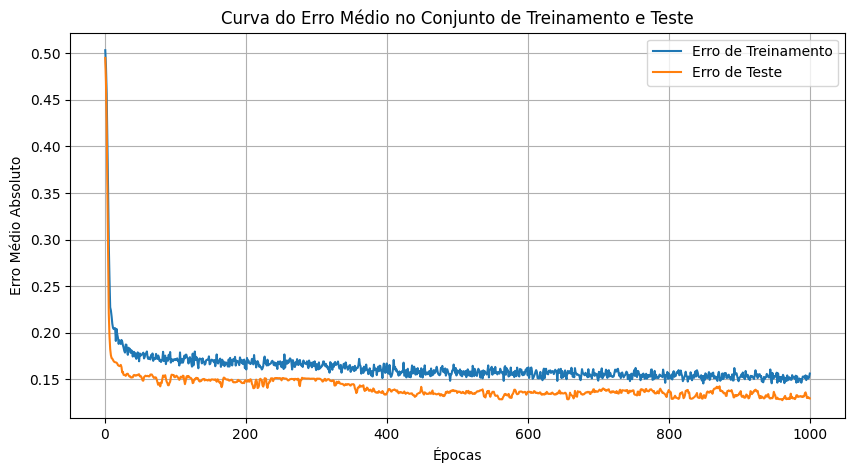

In [ ]:
# Definição dos hiperparâmetros
input_size = data_treino.shape[1] - 1
hidden_size1 = 64
hidden_size2 = 32
hidden_size3 = 16
dropout_rate = 0.3
learning_rate = 0.001
num_epochs = 1000
weight_decay = 1e-4

# Inicialização
model = MLP(input_size, hidden_size1, hidden_size2, hidden_size3, dropout_rate)
criterion = nn.L1Loss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate, weight_decay=weight_decay)

train_losses = []
test_losses = []

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for inputs, labels in dataloader:
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

    train_losses.append(running_loss / len(dataloader))

    # Validação
    model.eval()
    with torch.no_grad():
        outputs_test = model(features_test)
        loss_test = criterion(outputs_test, labels_test)
        test_losses.append(loss_test.item())

    print(f"Epoch [{epoch+1}/{num_epochs}], Train Loss: {train_losses[-1]:.4f}, Test Loss: {test_losses[-1]:.4f}")

# Plotando a curva de perda
plt.figure(figsize=(10, 5))
plt.plot(range(1, num_epochs+1), train_losses, label='Erro de Treinamento')
plt.plot(range(1, num_epochs+1), test_losses, label='Erro de Teste')
plt.title('Curva do Erro Médio no Conjunto de Treinamento e Teste')
plt.xlabel('Épocas')
plt.ylabel('Erro Médio Absoluto')
plt.legend()
plt.grid(True)
plt.show()


Acurácia: 0.8715


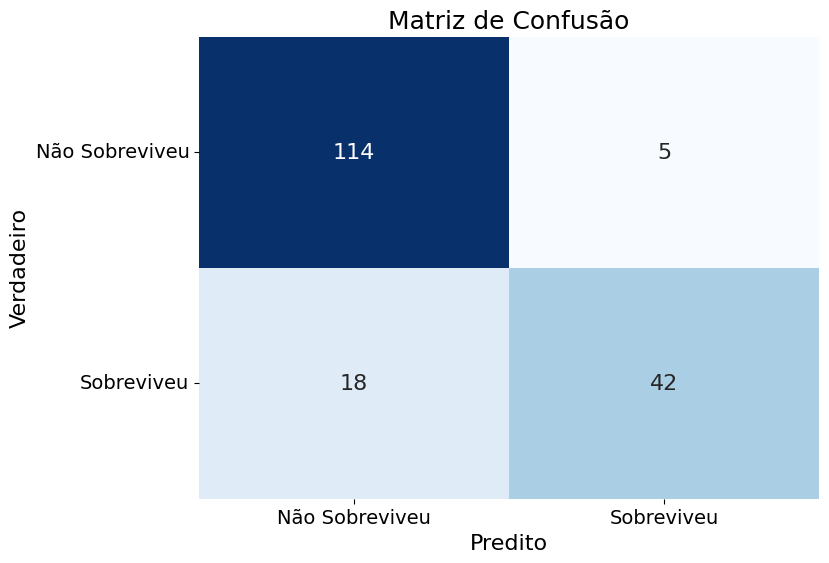

Relatório de Classificação:
              precision    recall  f1-score   support

         0.0       0.86      0.96      0.91       119
         1.0       0.89      0.70      0.79        60

    accuracy                           0.87       179
   macro avg       0.88      0.83      0.85       179
weighted avg       0.87      0.87      0.87       179



In [ ]:
# Avaliação do modelo test
model.eval()
with torch.no_grad():
    outputs_test = model(features_test)
    predicted_test = torch.round(outputs_test)

y_test_np = labels_test.numpy()
y_pred_np = predicted_test.numpy()

accuracy = accuracy_score(y_test_np, y_pred_np)
cm = confusion_matrix(y_test_np, y_pred_np)
classification_rep = classification_report(y_test_np, y_pred_np)

# acurácia
print(f"Acurácia: {accuracy:.4f}")

# Plot matriz de confusão
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, annot_kws={"size": 16})
plt.title('Matriz de Confusão', fontsize=18)
plt.xlabel('Predito', fontsize=16)
plt.ylabel('Verdadeiro', fontsize=16)
plt.xticks(ticks=[0.5, 1.5], labels=['Não Sobreviveu', 'Sobreviveu'], fontsize=14)
plt.yticks(ticks=[0.5, 1.5], labels=['Não Sobreviveu', 'Sobreviveu'], fontsize=14, rotation=0)
plt.show()

print(f"Relatório de Classificação:\n{classification_rep}")


Acurácia no Treinamento: 0.8497


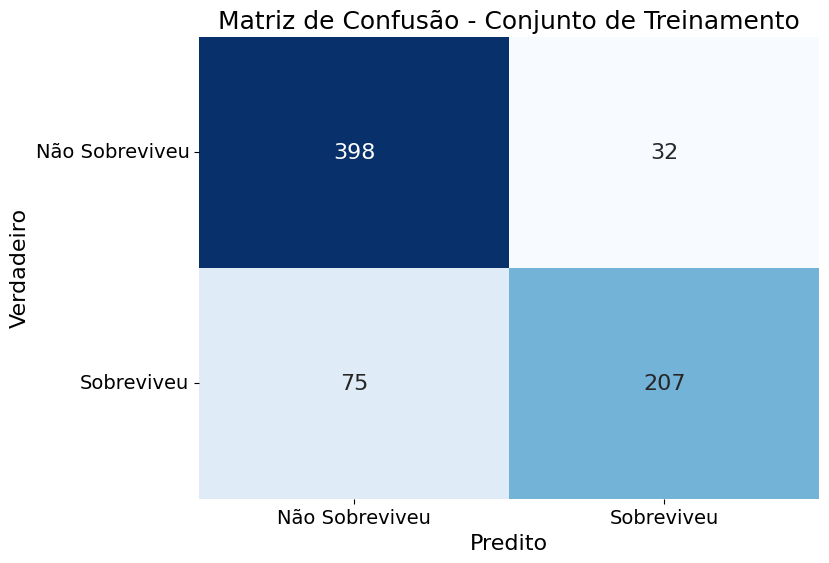

Relatório de Classificação - Treinamento:
              precision    recall  f1-score   support

         0.0       0.84      0.93      0.88       430
         1.0       0.87      0.73      0.79       282

    accuracy                           0.85       712
   macro avg       0.85      0.83      0.84       712
weighted avg       0.85      0.85      0.85       712



In [ ]:
#treino
model.eval()
with torch.no_grad():
    outputs_train = model(features_train)
    predicted_train = torch.round(outputs_train)

y_train_np = labels_train.numpy()
y_pred_train_np = predicted_train.numpy()

accuracy_train = accuracy_score(y_train_np, y_pred_train_np)
cm_train = confusion_matrix(y_train_np, y_pred_train_np)
classification_rep_train = classification_report(y_train_np, y_pred_train_np)

print(f"Acurácia no Treinamento: {accuracy_train:.4f}")

plt.figure(figsize=(8, 6))
sns.heatmap(cm_train, annot=True, fmt='d', cmap='Blues', cbar=False, annot_kws={"size": 16})
plt.title('Matriz de Confusão - Conjunto de Treinamento', fontsize=18)
plt.xlabel('Predito', fontsize=16)
plt.ylabel('Verdadeiro', fontsize=16)
plt.xticks(ticks=[0.5, 1.5], labels=['Não Sobreviveu', 'Sobreviveu'], fontsize=14)
plt.yticks(ticks=[0.5, 1.5], labels=['Não Sobreviveu', 'Sobreviveu'], fontsize=14, rotation=0)
plt.show()

print(f"Relatório de Classificação - Treinamento:\n{classification_rep_train}")


In [ ]:
# Calcular a importância das features
importances = np.mean(np.abs(model.fc1.weight.detach().numpy()), axis=0)
features_importance = pd.DataFrame(importances, index=data_treino.columns.drop('Survived'), columns=['Importance']).sort_values(by='Importance', ascending=False)

print(f"Importância das Features:\n{features_importance}")


Importância das Features:
            Importance
Sex           0.288472
FamilySize    0.255958
Pclass        0.245308
Age           0.221042
Fare          0.167353
Embarked      0.152855
